In [1]:
from tifffile import imread, imsave
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops_table, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import img_as_uint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import pandas as pd
from scipy import spatial
import numpy as np
import os

In [2]:
data_0 = imread('/data/data_drive/processing/Mike/data.tif')

In [49]:
conc = []
for i in range(129,0,-1):
    image = imread('/data/data_drive/processing/Mike/stardist/'+str(i)+'.tif')
    conc.append(image)
data = np.stack(conc,axis=0)

In [3]:
imsave('/data/data_drive/processing/Mike/stardist_inverse.tif',data)

NameError: name 'data' is not defined

In [2]:
data = imread('/data/data_drive/processing/Mike/data_median_threshold.tif')

In [34]:
thresh = filters.threshold_otsu(data[10])
bw = closing(data[10] > thresh, square(3))

In [4]:
N_rows = 114 
N_cols = data.shape[0] * 4
df = pd.DataFrame(np.zeros((N_rows, N_cols)))
label_image = label(data[0])
region_current = regionprops_table(label_image, properties=['label','centroid'])
#df = pd.DataFrame(region_current)

In [5]:
im = []
for frame in range(data.shape[0]):
    label_image = label(data[frame])
    image_label_overlay = np.expand_dims(label2rgb(label_image, image=data[frame]), axis=0)
    im.append(img_as_uint(image_label_overlay))
    #fig, ax = plt.subplots(figsize=(10, 6))
    #ax.imshow(image_label_overlay)
im = np.concatenate(im, axis=0)

In [5]:
label_image = label(data[0])
region_current = regionprops(label_image)


In [8]:
region_current[0].centroid

(98.89420935412026, 259.57572383073494)

In [46]:
label_image.shape

(659, 661)

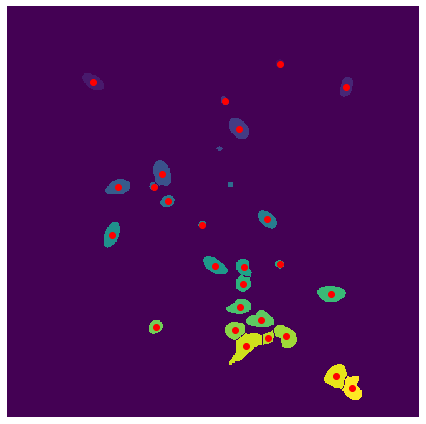

In [47]:
frame = 100 
label_image = label(data[frame])

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(label_image)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 90:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        x,y = region.centroid
        #rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
           #                       fill=False, edgecolor='red', linewidth=2)
        ax.scatter(y,x, color='r')

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [293]:
im.shape

(130, 659, 661, 3)

In [294]:
imsave('/home/ninatubau/Desktop/result.tif',im)

In [4]:
df = pd.DataFrame()
LAB= [] 
for frame in range(data.shape[0]-1): 
    pos = [-1000] * 114 
    dist = [-1000] * 114 
    cent0 = [-1000] * 114 
    cent1 = [-1000] * 114 
    label_image = label(data[frame])
    label_image_next = label(data[frame+1])
    #image_label_overlay = label2rgb(label_image, image=data[frame])
    #fig, ax = plt.subplots(figsize=(10, 6))
    #ax.imshow(image_label_overlay)
    region_current = regionprops(label_image)
    region_next = regionprops(label_image_next)

    LAB.append(len(region_current))
    centroids = [region_next[i].centroid for i in range(len(region_next))]
    tree = spatial.KDTree(centroids)
    
    for i in range(len(region_current)):
        new_point = region_current[i].centroid
        position = tree.query([new_point])[1][0]
        distance = tree.query([new_point])[0][0]
        value = region_next[position].centroid
        pos[i] = position
        dist[i] = distance 
        cent0[i] = value[1]
        cent1[i] = value[0]
    name_0 = 'centroid_x'+str(frame)
    name_1 = 'centroid_y'+str(frame)
    pos_ = 'pos_'+str(frame)
    dist_ = 'dist_'+str(frame)
    
    df[name_0] = cent0
    df[name_1] = cent1
    #df[pos_] = pos
    #df[dist_] = dist

In [33]:
condition_no_duplicates = (~df.duplicated(['pos_0'],keep=False))
condition_duplicates_small_dist = ((df.duplicated(['pos_0'],keep=False)) & (df['dist_0']<3))
indexes = df[~(condition_no_duplicates | condition_duplicates_small_dist)].index

In [39]:
df = pd.DataFrame()

In [5]:
N=100
area = (20 * np.random.rand(N))
c= np.sqrt(area)

In [7]:
c

array([0.9423493 , 3.58435558, 3.03894983, 3.97928727, 1.51608545,
       3.65800727, 3.92410879, 0.82968234, 3.74818277, 2.43722648,
       3.21942333, 2.7083885 , 3.73988657, 2.34321381, 0.83611094,
       3.0326111 , 1.40827957, 4.15074941, 1.99556388, 3.04988938,
       2.7807965 , 3.04349447, 4.39269929, 3.22011409, 3.98570455,
       3.20499803, 3.35101064, 1.00486045, 4.2242671 , 1.23056847,
       2.8188539 , 2.58989151, 3.70663022, 1.10608747, 3.33598983,
       0.39396926, 3.53132375, 3.68615424, 1.88931112, 3.72971338,
       2.10851664, 2.37793501, 4.3272989 , 1.86491281, 1.12532828,
       1.50101535, 2.80687819, 3.46663123, 2.12073932, 4.35489928,
       3.90685117, 3.15854295, 1.14334487, 0.6613226 , 4.30627289,
       4.01444416, 0.40939272, 1.26085901, 4.36549244, 4.1969996 ,
       3.43228456, 3.92684971, 4.41166474, 0.25587045, 4.07437001,
       4.23161926, 1.69153681, 3.31721074, 0.95423509, 2.7324409 ,
       2.40107012, 1.20721022, 1.13836048, 4.40988049, 1.10767

In [34]:
for frame in range(int(len(df.columns)/4)):
    centroid_x = 'centroid_x'+str(frame)
    centroid_y = 'centroid_y'+str(frame)
    position = 'pos_'+str(frame)
    distance = 'dist_'+str(frame)
    condition_no_duplicates = (~df.duplicated([position],keep=False))
    condition_duplicates_small_dist = ((df.duplicated([position],keep=False)) & (df[distance]<7.5))
    indexes = df[~(condition_no_duplicates | condition_duplicates_small_dist)].index
    for ind in indexes:
        df.at[ind, centroid_x] = 0 
        df.at[ind, centroid_y] = 0 


In [6]:
export_csv = df.to_csv ('/home/ninatubau/Desktop/dataframe_median.csv', index = None, header=True)

In [55]:
df

,centroid_x0,centroid_y0,centroid_x1,centroid_y1,centroid_x2,centroid_y2,centroid_x3,centroid_y3,centroid_x4,centroid_y4,...,centroid_x124,centroid_y124,centroid_x125,centroid_y125,centroid_x126,centroid_y126,centroid_x127,centroid_y127,centroid_x128,centroid_y128
0,259.597601,99.383860,259.249184,100.312296,258.543668,99.450873,258.615813,99.497773,260.817568,100.109234,...,545.281879,73.840604,545.192488,73.632238,545.070922,72.774823,438.257028,99.323293,444.239583,100.979167
1,229.332295,104.631360,228.879570,105.389247,229.006445,105.182599,228.283600,103.134402,229.764897,105.887324,...,442.103618,103.493421,442.557994,103.780564,444.303665,98.024433,438.257028,99.323293,353.728083,160.089153
2,309.275064,111.251928,198.719818,116.604784,309.684949,111.522959,310.012579,111.805031,309.842440,111.074968,...,350.997763,156.883669,352.677746,159.708092,353.251149,159.353752,353.686364,159.792424,444.787798,213.362069
3,198.747525,116.002475,309.747097,111.354839,199.072345,117.525088,199.382282,116.773058,199.998767,117.072750,...,339.676301,215.121387,340.793358,223.985240,444.781167,215.053050,338.881612,219.896725,339.938849,222.424460
4,178.254430,122.826582,177.816298,123.406077,177.672131,122.545082,178.612732,122.287798,178.769134,122.810540,...,427.323529,220.057487,439.949454,218.920765,337.050000,216.737037,443.691808,214.650195,248.707415,271.390782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
110,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
111,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000
112,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,...,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000


In [10]:
df[:10]

,centroid_x0,centroid_y0,centroid_x1,centroid_y1,centroid_x2,centroid_y2,centroid_x3,centroid_y3,centroid_x4,centroid_y4,...,centroid_x124,centroid_y124,centroid_x125,centroid_y125,centroid_x126,centroid_y126,centroid_x127,centroid_y127,centroid_x128,centroid_y128
0,254.365278,118.863056,253.906190,118.971366,253.662075,118.885015,246.106551,115.872741,254.458955,119.404707,...,544.509434,75.487871,545.315098,74.376368,545.027548,74.165289,547.287390,74.217009,548.362126,71.784053
1,188.925448,119.901075,189.368308,119.511777,189.564192,119.814712,189.837571,119.467514,189.474564,119.918605,...,441.426160,104.255274,442.368760,104.378422,441.587800,99.362292,441.229602,99.075901,437.330073,100.447433
2,309.088477,111.666667,309.777989,111.916509,309.644737,112.283835,310.789168,112.858801,310.159309,111.644914,...,353.200000,156.266667,351.595745,156.787234,352.086420,157.345679,353.717172,158.686869,351.377953,157.401575
3,341.879888,136.117318,341.753846,135.827972,342.354885,136.501437,342.485021,136.754636,254.458955,119.404707,...,340.414201,219.508876,440.158065,219.353226,445.135314,215.415842,443.419304,215.637658,444.098074,214.005254
4,315.582261,163.073989,315.712281,163.506579,315.758543,163.240558,316.569027,163.373451,342.405210,137.034732,...,427.962264,220.626072,339.682635,217.742515,339.450820,216.803279,339.350000,216.314286,338.033333,215.540000
5,216.407154,177.078689,216.800118,177.439505,216.984947,177.556671,201.538913,187.804699,316.480562,164.056674,...,360.500000,287.500000,360.471698,287.301887,246.260000,289.708000,245.424837,290.457516,247.105263,273.447368
6,216.407154,177.078689,367.543051,177.553625,367.436893,177.283047,367.846946,177.645327,200.113772,160.065868,...,247.335878,291.053435,246.917847,288.393768,246.260000,289.708000,360.642857,286.214286,360.300000,285.700000
7,367.329231,177.370769,282.013605,197.984127,278.106572,189.939609,277.495442,191.602145,234.530387,169.146409,...,145.777305,324.866667,145.762036,323.261348,361.888889,285.666667,145.018466,324.231534,243.652174,290.967391
8,277.614017,191.347384,391.728314,205.422259,391.207018,205.338596,392.998230,203.322124,368.013216,177.662261,...,361.843185,352.728589,362.762485,353.727162,144.646820,323.784844,369.382353,347.818414,144.720648,324.214575
9,216.407154,177.078689,342.690751,210.809249,342.667185,211.124417,342.963450,210.922515,288.562937,193.832168,...,313.042857,350.335714,313.298246,350.903509,366.451888,349.663825,306.723724,345.975976,305.927835,344.136082


In [22]:
for i in range(10):
    a = df[df.iloc[:, 1] > -1000].iloc[0,2*i]


In [41]:
list_= [x for x in range(len(df.columns))]
oddList = list_[1::2]
evenList = list_[0::2]


In [42]:
evensList

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257]

In [43]:
x_point = df.iloc[1, evensList]
y_point = df.iloc[1, oddList]

In [44]:
y_point

centroid_y0      119.901075
centroid_y1      119.511777
centroid_y2      119.814712
centroid_y3      119.467514
centroid_y4      119.918605
                    ...    
centroid_y124    104.255274
centroid_y125    104.378422
centroid_y126     99.362292
centroid_y127     99.075901
centroid_y128    100.447433
Name: 1, Length: 129, dtype: float64

In [91]:
x_point

0      99.383860
1     104.631360
2     111.251928
3     116.002475
4     122.826582
5     127.264472
6     134.909346
7     135.753261
8     163.232005
9     157.389637
10    176.475857
11    167.496063
12    176.565771
13    187.385542
14    187.868376
15    197.609079
16    203.756032
17    203.255489
18    210.167179
19    212.063448
20    221.839849
21    225.906634
22    227.527574
23    235.080508
24    236.707386
25    250.455769
26    247.045213
27    274.087468
28    277.893252
29    265.842365
30    303.351187
31    316.206987
32    345.634192
33    348.624347
34    366.149419
35    348.624347
36    366.149419
37    399.039062
38    397.121172
39    399.042226
40    427.538879
41    427.806209
42    465.634309
43    490.707418
44    508.873037
45    525.685415
46    525.685415
47    571.524496
48    585.271868
49    598.048077
50    611.932836
Name: centroid_y0, dtype: float64

In [90]:
np.array([x_point, y_point]).shape

(2,)

In [59]:
df.iloc[:,1][df['centroid_x0'] < -100]

51    -1000.0
52    -1000.0
53    -1000.0
54    -1000.0
55    -1000.0
        ...  
109   -1000.0
110   -1000.0
111   -1000.0
112   -1000.0
113   -1000.0
Name: centroid_y0, Length: 63, dtype: float64

In [6]:
point = df.iloc[[4]].as_matrix()
even = np.arange(0,258,2)
odd = np.arange(1,258,2)
x_point = []
y_point = []
for i in even: 
    x_point.append(point[0,i]) 
for i in odd: 
    y_point.append(point[0,i])   

/home/ninatubau/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
